**Подготовка данных**
*   Удаление ненужных столбцов
*   Заполнение пропущенных значений (NaN)
*   Перевод классов параметров в числовой вид
*   Нормализация данных




In [62]:
import pandas as pd
import numpy as np
import csv
import folium
import random
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from geopy.geocoders import Nominatim
from sklearn import metrics
from time import sleep
%matplotlib inline

In [121]:
df = pd.read_csv('kvar_info.csv',sep=",",on_bad_lines='warn')
df = df.replace ( r'^\s*$' , np.nan , regex= True )
df


Skipping line 714: expected 17 fields, saw 20
Skipping line 1020: expected 17 fields, saw 20



,Адрес,Район,Количество комнат,Площадь м2,Этаж,Балкон,Высота потолков м,Санузел,Окна,Ремонт,Вид сделки,Тип дома,Количество этажей,Лифт,Год постройки,Дата публикации,Стоимость
0,"Республика Бурятия, Улан-Удэ, 47-й квартал, Ко...",Октябрьский район,студия,27.7,4,балкон,NaN,совмещенный,во двор,требует ремонта,возможна ипотека,монолитно-кирпичный,12,1.0,2023.0,26 марта в 14:47,3950000
1,"Республика Бурятия, Улан-Удэ, пр-т Строителей,...",Октябрьский район,3,72.7,1,"балкон, лоджия",2.8,раздельный,"во двор, на улицу, на солнечную сторону",евро,возможна ипотека,кирпичный,5,0.0,2007.0,7 апреля в 15:50,10000000
2,"Республика Бурятия, Улан-Удэ, ул. Смолина, 79",Советский район,студия,35.0,3,балкон,NaN,совмещенный,на улицу,косметический,возможна ипотека,монолитный,9,1.0,2011.0,31 марта в 16:58,6990000
3,"Республика Бурятия, Улан-Удэ, Комсомольская ул...",Железнодорожный район,1,35.8,5,балкон,2.5,совмещенный,"во двор, на солнечную сторону",евро,возможна ипотека,кирпичный,9,1.0,2014.0,31 марта в 15:21,7750000
4,"Республика Бурятия, Улан-Удэ, ул. Тулаева, 138",Октябрьский район,1,30.9,3,балкон,2.5,совмещенный,"во двор, на солнечную сторону",косметический,возможна ипотека,панельный,5,0.0,1974.0,24 марта в 23:54,4100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,"мкр. 148-А, стр. 3",Октябрьский район,1,38.2,5,балкон,2.9,совмещенный,"на улицу, на солнечную сторону",NaN,возможна ипотека,панельный,16,2.0,NaN,11 марта в 10:06,3350000
1495,"Республика Бурятия, Улан-Удэ, мкр-н Энергетик, 46",Октябрьский район,2,82.3,1,балкон,NaN,раздельный,во двор,косметический,возможна ипотека,кирпичный,3,0.0,1993.0,20 марта в 16:21,9400000
1496,"Республика Бурятия, Улан-Удэ, 112-й мкр-н, 24",Октябрьский район,1,27.9,1,балкон,NaN,совмещенный,NaN,косметический,возможна ипотека,монолитный,5,0.0,NaN,11 марта в 13:33,4100000
1497,"Республика Бурятия, Улан-Удэ, ул. Бабушкина, 23",Октябрьский район,3,57.0,1,NaN,NaN,раздельный,NaN,евро,возможна ипотека,кирпичный,5,0.0,NaN,17 марта в 05:16,7000000


In [122]:

del df['Высота потолков м']
del df['Год постройки']

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Адрес              1499 non-null   object 
 1   Район              1499 non-null   object 
 2   Количество комнат  1499 non-null   object 
 3   Площадь м2         1499 non-null   float64
 4   Этаж               1499 non-null   int64  
 5   Балкон             1164 non-null   object 
 6   Санузел            1499 non-null   object 
 7   Окна               1172 non-null   object 
 8   Ремонт             1418 non-null   object 
 9   Вид сделки         1045 non-null   object 
 10  Тип дома           1498 non-null   object 
 11  Количество этажей  1499 non-null   int64  
 12  Лифт               1087 non-null   float64
 13  Дата публикации    1499 non-null   object 
 14  Стоимость          1499 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 175.8+ KB


In [124]:
nan_count=df.isna().sum()
print(nan_count)

Адрес                  0
Район                  0
Количество комнат      0
Площадь м2             0
Этаж                   0
Балкон               335
Санузел                0
Окна                 327
Ремонт                81
Вид сделки           454
Тип дома               1
Количество этажей      0
Лифт                 412
Дата публикации        0
Стоимость              0
dtype: int64


In [125]:
repairs=df['Ремонт'].value_counts().index[:3]
df['Ремонт']=df['Ремонт'].fillna(random.choice(repairs))

type_of_agreement=df['Вид сделки'].value_counts().index[:3]
df['Вид сделки']=df['Вид сделки'].fillna(random.choice(type_of_agreement))

windows=df['Окна'].value_counts().index[:3]
df['Окна']=df['Окна'].fillna(random.choice(windows))

type_of_house=df['Тип дома'].value_counts().index[:3]
df['Тип дома']=df['Тип дома'].fillna(random.choice(type_of_house))

balcont=df['Балкон'].value_counts().index[:3]
df['Балкон']=df['Балкон'].fillna('Нет балкона')

In [126]:
for index, row in df.iterrows():
  if row['Количество этажей']>5:
    df.at[index, 'Лифт'] = 1.0
  else:
    df.at[index, 'Лифт'] = 0

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Адрес              1499 non-null   object 
 1   Район              1499 non-null   object 
 2   Количество комнат  1499 non-null   object 
 3   Площадь м2         1499 non-null   float64
 4   Этаж               1499 non-null   int64  
 5   Балкон             1499 non-null   object 
 6   Санузел            1499 non-null   object 
 7   Окна               1499 non-null   object 
 8   Ремонт             1499 non-null   object 
 9   Вид сделки         1499 non-null   object 
 10  Тип дома           1499 non-null   object 
 11  Количество этажей  1499 non-null   int64  
 12  Лифт               1499 non-null   float64
 13  Дата публикации    1499 non-null   object 
 14  Стоимость          1499 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 175.8+ KB


In [128]:
df_num = df

In [129]:
replacement_district = {
    'Октябрьский район': 1,
    'Железнодорожный район': 2,
    'Советский район': 3,
    'Иволгинский район': 4
}
df_num['Район'].replace(replacement_district,inplace=True)

In [130]:
df_num = df_num.loc[df['Количество комнат'] != 'свободная планировка']
df_num['Количество комнат'].replace('студия',0,inplace=True)
df_num['Количество комнат'] = df_num['Количество комнат'].astype('int64')

<ipython-input-130-1151590425d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Количество комнат'].replace('студия',0,inplace=True)
<ipython-input-130-1151590425d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Количество комнат'] = df_num['Количество комнат'].astype('int64')


In [131]:
replacement_balcony = {
    'Нет балкона': 0,
    'балкон': 1,
    'лоджия': 2,
    'балкон, лоджия': 3
}
df_num = df_num.loc[df['Балкон'] != '2.8']
df_num = df_num.loc[df['Балкон'] != '2.6']
df_num['Балкон'].replace(replacement_balcony,inplace=True)

In [132]:
replacement_bathroom = {
    'совмещенный': 1,
    'раздельный': 2,
    'совмещенный, раздельный': 3
}
df_num['Санузел'].replace(replacement_bathroom,inplace=True)

In [133]:
replacement_windows = {
    'во двор': 1,
    'на улицу': 2,
    'на солнечную сторону': 3,
    'во двор, на улицу': 4,
    'во двор, на солнечную сторону': 5,
    'на улицу, на солнечную сторону': 6,
    'во двор, на улицу, на солнечную сторону': 7
}
df_num['Окна'].replace(replacement_windows,inplace=True)

In [134]:
replacement_repair = {
    'требует ремонта': 0,
    'косметический': 1,
    'евро': 2,
    'дизайнерский': 3
}
df_num['Ремонт'].replace(replacement_repair,inplace=True)

In [135]:
replacement_house = {
    'кирпичный': 1,
    'панельный': 2,
    'монолитно-кирпичный': 3,
    'монолитный': 4,
    'деревянный': 5,
    'блочный': 6
}
df_num['Тип дома'].replace(replacement_house,inplace=True)

In [136]:
df_num

,Адрес,Район,Количество комнат,Площадь м2,Этаж,Балкон,Санузел,Окна,Ремонт,Вид сделки,Тип дома,Количество этажей,Лифт,Дата публикации,Стоимость
0,"Республика Бурятия, Улан-Удэ, 47-й квартал, Ко...",1,0,27.7,4,1,1,1,0,возможна ипотека,3,12,1.0,26 марта в 14:47,3950000
1,"Республика Бурятия, Улан-Удэ, пр-т Строителей,...",1,3,72.7,1,3,2,7,2,возможна ипотека,1,5,0.0,7 апреля в 15:50,10000000
2,"Республика Бурятия, Улан-Удэ, ул. Смолина, 79",3,0,35.0,3,1,1,2,1,возможна ипотека,4,9,1.0,31 марта в 16:58,6990000
3,"Республика Бурятия, Улан-Удэ, Комсомольская ул...",2,1,35.8,5,1,1,5,2,возможна ипотека,1,9,1.0,31 марта в 15:21,7750000
4,"Республика Бурятия, Улан-Удэ, ул. Тулаева, 138",1,1,30.9,3,1,1,5,1,возможна ипотека,2,5,0.0,24 марта в 23:54,4100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,"мкр. 148-А, стр. 3",1,1,38.2,5,1,1,6,1,возможна ипотека,2,16,1.0,11 марта в 10:06,3350000
1495,"Республика Бурятия, Улан-Удэ, мкр-н Энергетик, 46",1,2,82.3,1,1,2,1,1,возможна ипотека,1,3,0.0,20 марта в 16:21,9400000
1496,"Республика Бурятия, Улан-Удэ, 112-й мкр-н, 24",1,1,27.9,1,1,1,2,1,возможна ипотека,4,5,0.0,11 марта в 13:33,4100000
1497,"Республика Бурятия, Улан-Удэ, ул. Бабушкина, 23",1,3,57.0,1,0,2,2,2,возможна ипотека,1,5,0.0,17 марта в 05:16,7000000


In [137]:
features = ['Район', 'Количество комнат', 'Площадь м2', 'Этаж', 'Балкон', 'Санузел','Окна', 'Ремонт',
            'Тип дома', 'Количество этажей', 'Лифт', 'Стоимость']

In [138]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df_num[features]))
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.0,0.116447,0.016760,0.333333,0.0,0.000000,0.000000,0.4,0.523810,1.0,0.119048
1,0.000000,0.6,0.412500,0.000000,1.000000,0.5,1.000000,0.666667,0.0,0.190476,0.0,0.340659
2,0.666667,0.0,0.164474,0.011173,0.333333,0.0,0.166667,0.333333,0.6,0.380952,1.0,0.230403
3,0.333333,0.2,0.169737,0.022346,0.333333,0.0,0.666667,0.666667,0.0,0.380952,1.0,0.258242
4,0.000000,0.2,0.137500,0.011173,0.333333,0.0,0.666667,0.333333,0.2,0.190476,0.0,0.124542
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.000000,0.2,0.185526,0.022346,0.333333,0.0,0.833333,0.333333,0.2,0.714286,1.0,0.097070
1492,0.000000,0.4,0.475658,0.000000,0.333333,0.5,0.000000,0.333333,0.0,0.095238,0.0,0.318681
1493,0.000000,0.2,0.117763,0.000000,0.333333,0.0,0.166667,0.333333,0.6,0.190476,0.0,0.124542
1494,0.000000,0.6,0.309211,0.000000,0.000000,0.5,0.166667,0.666667,0.0,0.190476,0.0,0.230769


**Обучение модели полиномиальной регрессии и оценка модели.**

In [80]:
data= df_num

In [81]:
X = data.drop(['Адрес', 'Вид сделки', 'Дата публикации'], axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Район,Количество комнат,Площадь м2,Этаж,Балкон,Санузел,Окна,Ремонт,Тип дома,Количество этажей,Лифт,Стоимость
0,0.000000,0.0,0.116447,0.016760,0.333333,0.0,0.000000,0.000000,0.4,0.523810,1.0,0.119048
1,0.000000,0.6,0.412500,0.000000,1.000000,0.5,1.000000,0.666667,0.0,0.190476,0.0,0.340659
2,0.666667,0.0,0.164474,0.011173,0.333333,0.0,0.166667,0.333333,0.6,0.380952,1.0,0.230403
3,0.333333,0.2,0.169737,0.022346,0.333333,0.0,0.666667,0.666667,0.0,0.380952,1.0,0.258242
4,0.000000,0.2,0.137500,0.011173,0.333333,0.0,0.666667,0.333333,0.2,0.190476,0.0,0.124542
...,...,...,...,...,...,...,...,...,...,...,...,...
1488,0.000000,0.2,0.185526,0.022346,0.333333,0.0,0.833333,0.000000,0.2,0.714286,1.0,0.097070
1489,0.000000,0.4,0.475658,0.000000,0.333333,0.5,0.000000,0.333333,0.0,0.095238,0.0,0.318681
1490,0.000000,0.2,0.117763,0.000000,0.333333,0.0,0.500000,0.333333,0.6,0.190476,0.0,0.124542
1491,0.000000,0.6,0.309211,0.000000,0.000000,0.5,0.500000,0.666667,0.0,0.190476,0.0,0.230769


In [82]:
y = X['Стоимость']
X = X.drop(['Стоимость'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0029056008545128528


In [83]:
from sklearn.metrics import r2_score, mean_squared_error
# Вычисление коэффициента детерминации (R²)
r2 = model.score(X_test, y_test)
example_prediction = model.predict(X_test.head())
print("Предсказанная стоимость:", example_prediction)
print("Фактическая стоимость:", y_test[:5].tolist())

Предсказанная стоимость: [0.11785271 0.09403648 0.26693091 0.22093464 0.10869672]
Фактическая стоимость: [0.09340659340659341, 0.10256410256410256, 0.22893772893772893, 0.222585347985348, 0.1347985347985348]


In [84]:
print(r2)

0.6746833048402272


In [85]:
gg = data.drop(['Адрес', 'Вид сделки', 'Дата публикации'], axis=1)
#gg= pd.DataFrame(scaler.fit_transform(gg), columns=gg.columns)
# Восстановление исходного диапазона значений
original_min_vals = gg['Стоимость'].min()
original_max_vals = gg['Стоимость'].max()
# Обратное масштабирование каждого признака с помощью формулы
original_df =  (example_prediction * (original_max_vals - original_min_vals) + original_min_vals).round()

# Вывод результата
print("Пример предсказания:", example_prediction)
print("Стоимость:", original_df)

Пример предсказания: [0.11785271 0.09403648 0.26693091 0.22093464 0.10869672]
Стоимость: [3917379. 3267196. 7987214. 6731516. 3667420.]


**Корреляционный анализ**

In [86]:
del df_num['Адрес']
del df_num['Вид сделки']
del df_num['Дата публикации']

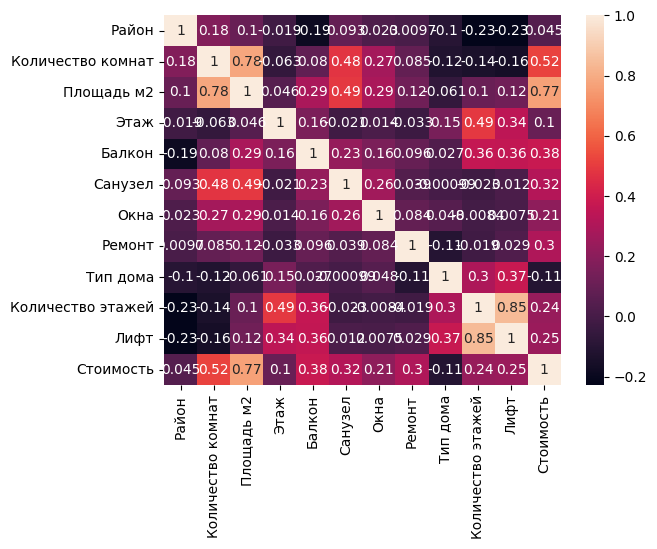

In [87]:
# Создаем матрицу корреляций
corr_matrix = df_num.corr()

# Используем seaborn для визуализации корреляционной матрицы
sns.heatmap(corr_matrix, annot=True)
plt.show()

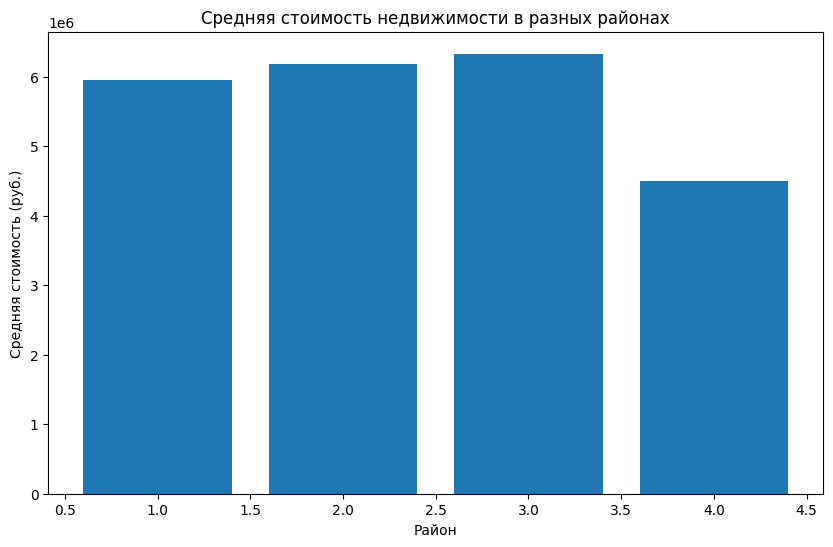

In [88]:
# Создаем новый DataFrame только с данными о стоимости и районе
df_cost_by_district = df_num[['Район', 'Стоимость']].groupby('Район').mean().reset_index()

# Переименовываем колонки для лучшего понимания
df_cost_by_district.columns = ['Район', 'Средняя_стоимость']

# Визуализируем среднюю стоимость недвижимости в разных районах
plt.figure(figsize=(10, 6))
plt.bar(df_cost_by_district['Район'], df_cost_by_district['Средняя_стоимость'])
plt.title("Средняя стоимость недвижимости в разных районах")
plt.xlabel("Район")
plt.ylabel("Средняя стоимость (руб.)")
plt.show()

**Визуализация**

In [89]:

list_of_lists = []
# Итерация по каждой строке
for index, row in df.iterrows():
    # Создаем список для текущей строки и добавляем его в list_of_lists
    list_of_lists.append(row["Адрес"])
# Вывод списка списков

data = {
    "Адрес": list_of_lists
}
df_adress = pd.DataFrame(data)
df_adress.to_csv('geodata.csv', index=False, header=True)

In [90]:
df_adress = df_adress.iloc[50:1498]
df_adress

,Адрес
50,"Республика Бурятия, Улан-Удэ, ул. имени Д.Ц. Д..."
51,"мкр. 148-А, стр. 2"
52,"Республика Бурятия, Улан-Удэ, мкр-н Энергетик, 41"
53,"Республика Бурятия, Улан-Удэ, ул. Ленина, 19"
54,"Республика Бурятия, Улан-Удэ, мкр-н Загорск, у..."
...,...
1493,"Республика Бурятия, Улан-Удэ, мкр-н Аэропорт, 23"
1494,"мкр. 148-А, стр. 3"
1495,"Республика Бурятия, Улан-Удэ, мкр-н Энергетик, 46"
1496,"Республика Бурятия, Улан-Удэ, 112-й мкр-н, 24"


In [91]:
def address_to_coordinates(address):
    geolocator = Nominatim(user_agent="Tester", timeout=5)
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Преобразование адресов в координаты
df_adress[["Широта", "Долгота"]] = df_adress["Адрес"].apply(lambda x: pd.Series(address_to_coordinates(x)))

In [92]:
df_adress.to_csv('geodata.csv', index=False, header=True)

In [93]:
df_adress = pd.read_csv('geodata.csv')
df = pd.read_csv('kvar_info.csv')
df_adress['Стоимость'] = np.zeros((len(df_adress),1))
for i in range(len(df_adress)):
  for j in range(len(df)):
    if df_adress['Адрес'][i] == df['Адрес'][j]:
      df_adress['Стоимость'][i] = df['Стоимость'][j]
df_adress = df_adress.dropna()
df_adress

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-93-82f8f1387877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adress['Стоимость'][i] = df['Стоимость'][j]
<ipython-input-93-82f8f1387877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adress['Стоимость'][i] = df['Стоимость'][j]
<ipython-input-93-82f8f1387877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adress['Стоимость'][i] = df['Ст

,Адрес,Широта,Долгота,Стоимость
3,"Республика Бурятия, Улан-Удэ, ул. Ленина, 19",51.824117,107.584789,1590000.0
5,"Республика Бурятия, Улан-Удэ, ул. Жердева, 94",51.808483,107.660865,4960000.0
6,"Республика Бурятия, Улан-Удэ, Геологическая ул...",51.810119,107.607680,7100000.0
7,"Республика Бурятия, Улан-Удэ, ул. Маяковского, 5",51.843701,107.601590,6700000.0
8,"Республика Бурятия, Улан-Удэ, ул. Смолина, 81",51.839794,107.576816,6000000.0
...,...,...,...,...
1438,"Республика Бурятия, Улан-Удэ, Тобольская ул., 61",51.814545,107.658609,7000000.0
1440,"Республика Бурятия, Улан-Удэ, ул. Бабушкина, 178",51.800195,107.603911,10800000.0
1441,"Республика Бурятия, Улан-Удэ, ул. Толстого, 14",51.824513,107.599771,6200000.0
1442,"Республика Бурятия, Улан-Удэ, Ключевская ул., 61",51.821580,107.630231,12200000.0


In [94]:
# Предположим, что у вас есть колонки 'Address', 'Latitude' и 'Longitude'
addresses = list(zip(df_adress['Адрес'], df_adress['Широта'], df_adress['Долгота']))

# Создаем карту
map_object = folium.Map(location=[51.82279165, 107.64344125], zoom_start=13)

# Добавляем метки на карту
for index, (address, lat, lng) in enumerate(addresses):
    # Используем индекс для определения цвета маркера
    if df_adress['Стоимость'][df_adress['Стоимость'] < 6000000][df_adress['Адрес'] == address].any():
      color = 'green'
    elif df_adress['Стоимость'][df_adress['Стоимость'] < 8000000][df_adress['Адрес'] == address].any():
      color = 'yellow'
    elif df_adress['Стоимость'][df_adress['Стоимость'] < 10000000][df_adress['Адрес'] == address].any():
      color = 'orange'
    else:
      color = 'red'
    # color = 'red' if index % 2 == 0 else 'blue'
    icon = folium.Icon(color=color)
    folium.Marker([lat, lng], popup=f'<b>{address}</b>', icon=icon).add_to(map_object)

# Сохраняем карту в HTML файл
map_object.save('map.html')

from google.colab import files
files.download('map.html')

<ipython-input-94-610018d47da7>:19: UserWarning: color argument of Icon should be one of: {'darkred', 'darkblue', 'lightgray', 'blue', 'green', 'red', 'lightred', 'gray', 'purple', 'beige', 'lightgreen', 'cadetblue', 'lightblue', 'orange', 'black', 'white', 'darkgreen', 'darkpurple', 'pink'}.
  icon = folium.Icon(color=color)
<ipython-input-94-610018d47da7>:19: UserWarning: color argument of Icon should be one of: {'darkred', 'darkblue', 'lightgray', 'blue', 'green', 'red', 'lightred', 'gray', 'purple', 'beige', 'lightgreen', 'cadetblue', 'lightblue', 'orange', 'black', 'white', 'darkgreen', 'darkpurple', 'pink'}.
  icon = folium.Icon(color=color)
<ipython-input-94-610018d47da7>:19: UserWarning: color argument of Icon should be one of: {'darkred', 'darkblue', 'lightgray', 'blue', 'green', 'red', 'lightred', 'gray', 'purple', 'beige', 'lightgreen', 'cadetblue', 'lightblue', 'orange', 'black', 'white', 'darkgreen', 'darkpurple', 'pink'}.
  icon = folium.Icon(color=color)
<ipython-input-9

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>